In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Shape: (1025, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   se

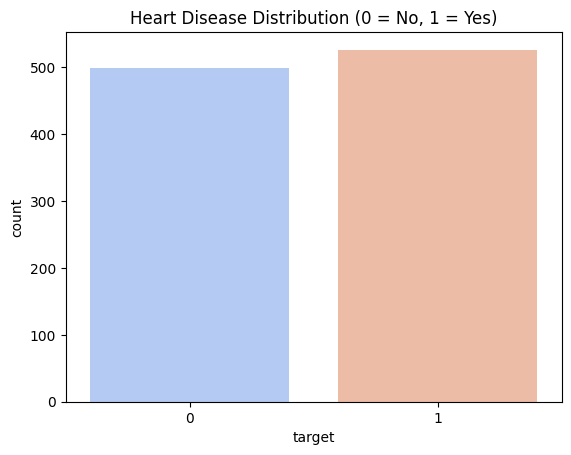


✅ Feature engineering completed. New features added:
['age_oldpeak_interaction', 'chol_age_ratio']

Categorical features: []
Numerical features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_oldpeak_interaction', 'chol_age_ratio']

✅ EDA & preprocessing setup complete.


In [3]:
# ==============================================
# HEART DISEASE CLASSIFICATION — EDA & PREPROCESSING
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# =====================
# 1. Load dataset
# =====================
df = pd.read_csv("heart_disease.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())
print(df.info())

# =====================
# 2. Basic EDA
# =====================

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Target distribution
print("\nTarget distribution:")
print(df['target'].value_counts(normalize=True))

sns.countplot(x='target', hue='target', data=df, palette="coolwarm", legend=False)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

# =====================
# 3. Feature Engineering
# =====================
# Create interaction term: age * oldpeak (heart stress relationship)
df['age_oldpeak_interaction'] = df['age'] * df['oldpeak']

# Create cholesterol to age ratio (health age risk indicator)
df['chol_age_ratio'] = df['chol'] / df['age']

print("\n✅ Feature engineering completed. New features added:")
print(["age_oldpeak_interaction", "chol_age_ratio"])

# =====================
# 4. Identify numerical & categorical columns
# =====================

cat_features = df.select_dtypes(include=['object']).columns.tolist()  # dataset may have none
num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Remove target from features
if "target" in num_features:
    num_features.remove("target")

print("\nCategorical features:", cat_features)
print("Numerical features:", num_features)

# =====================
# 5. Train-test split
# =====================
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =====================
# 6. Preprocessing Pipelines
# =====================

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

print("\n✅ EDA & preprocessing setup complete.")

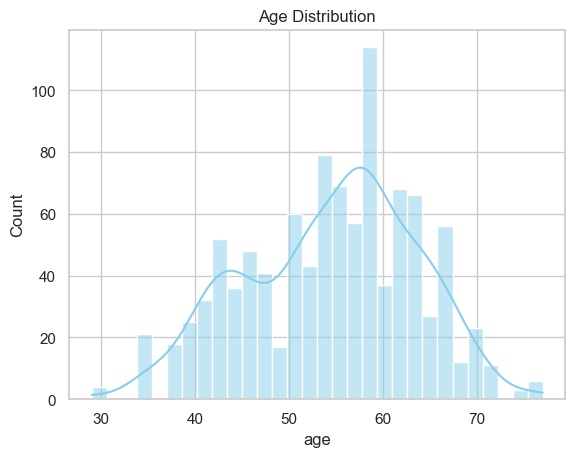

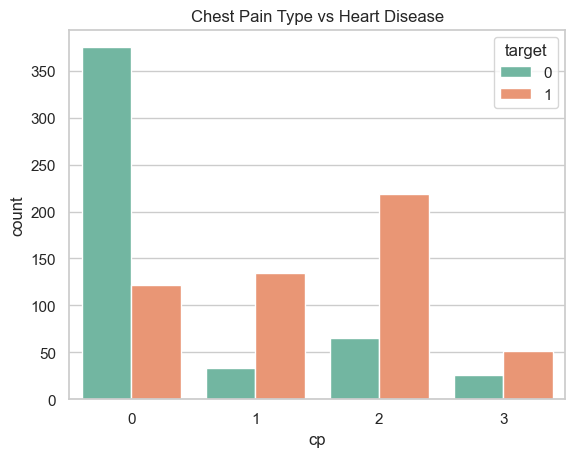

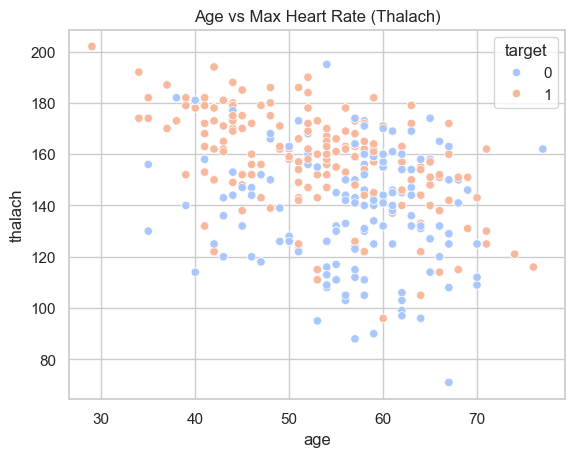

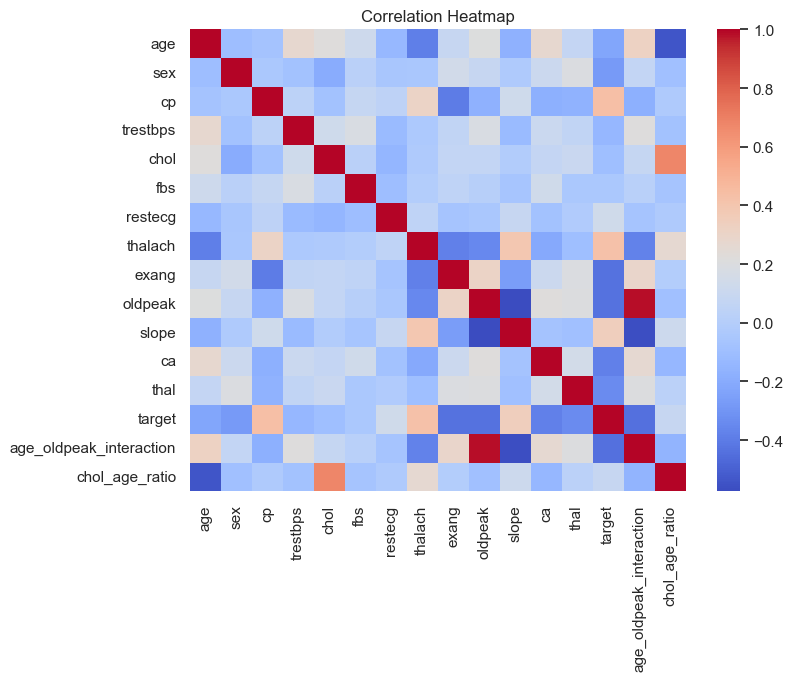

✅ Visualizations completed.


In [4]:
# ==============================================
# HEART DISEASE — DATA VISUALIZATION
# ==============================================

sns.set(style="whitegrid")

# Histogram: Age
sns.histplot(df['age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

# Chest pain type vs target (if exists)
if 'cp' in df.columns:
    sns.countplot(x='cp', hue='target', data=df, palette="Set2")
    plt.title("Chest Pain Type vs Heart Disease")
    plt.show()

# Scatter: age vs max heart rate
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette="coolwarm")
plt.title("Age vs Max Heart Rate (Thalach)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

print("✅ Visualizations completed.")

Before SMOTE: [399 421]
After SMOTE: [421 421]
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       100
           1       0.79      0.90      0.84       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205


Feedforward NN Results:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy      

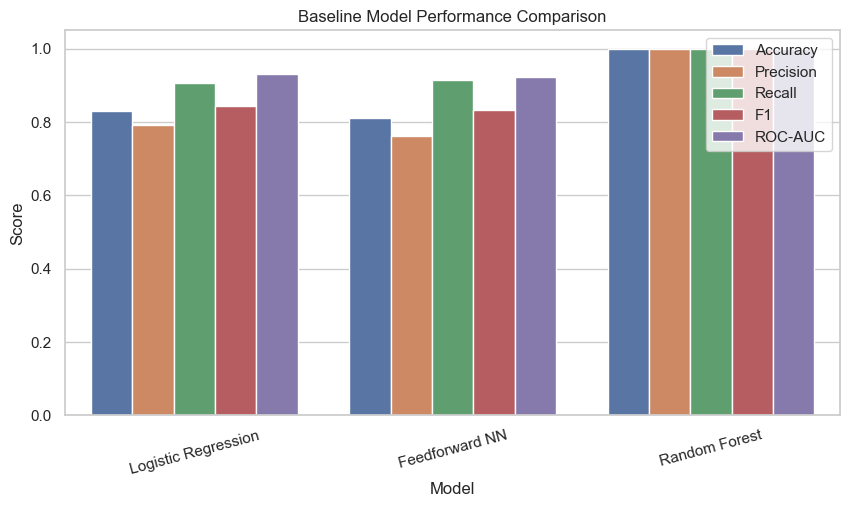

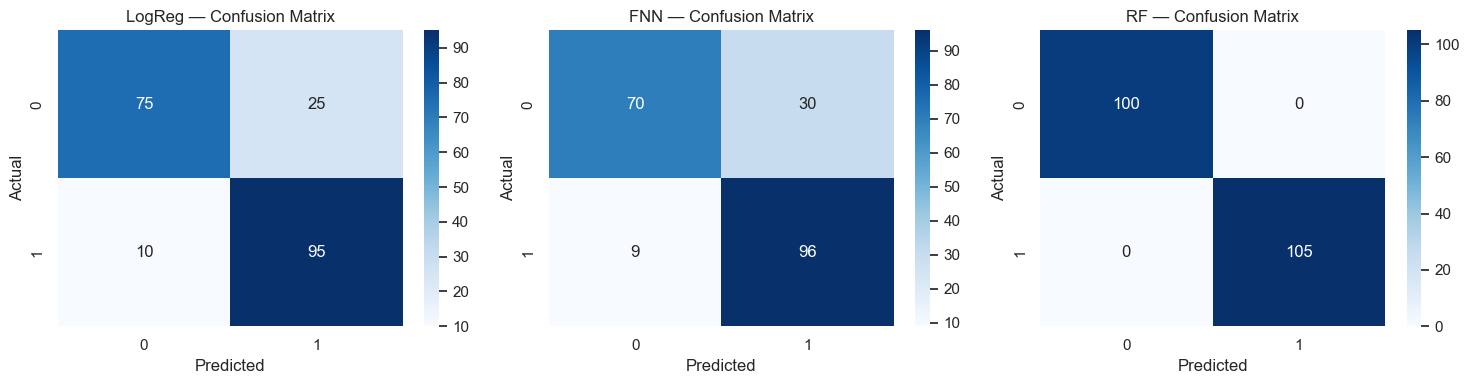

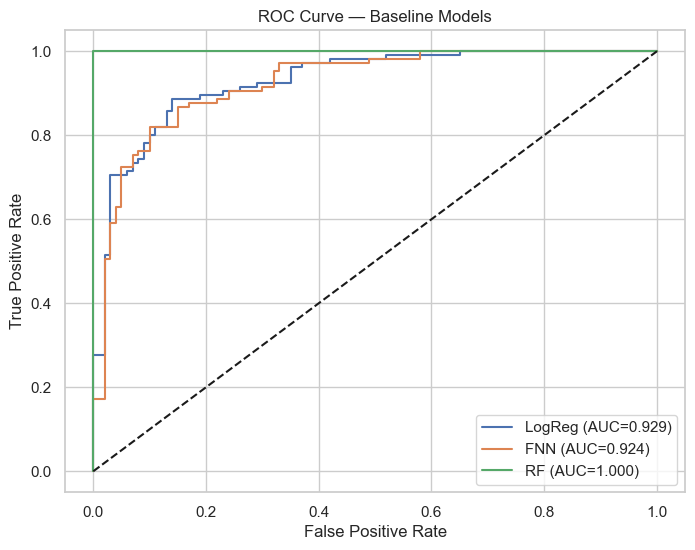

In [12]:
# ==============================================
# MODEL TRAINING & BASELINE EVALUATION
# ==============================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Transform and preprocess
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE (oversampling minority class)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_bal))

# =====================
# Logistic Regression
# =====================
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)
y_pred_lr = log_reg.predict(X_test_processed)
y_pred_lr_prob = log_reg.predict_proba(X_test_processed)[:, 1]

# =====================
# Neural Network (FNN)
# =====================
def build_fnn(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

fnn = build_fnn(X_train_bal.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

fnn.fit(X_train_bal, y_train_bal, validation_split=0.2, epochs=30, batch_size=64, verbose=0, callbacks=[early_stop])
y_pred_fnn_prob = fnn.predict(X_test_processed).ravel()
y_pred_fnn = (y_pred_fnn_prob > 0.5).astype(int)

# =====================
# Random Forest
# =====================
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_clf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_clf.predict(X_test_processed)
y_pred_rf_prob = rf_clf.predict_proba(X_test_processed)[:, 1]

# =====================
# Evaluation Function
# =====================
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n{name} Results:")
    print(classification_report(y_true, y_pred))
    return [
        name,
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        roc_auc_score(y_true, y_prob)
    ]

# Collect baseline results
results = []
results.append(evaluate_model("Logistic Regression", y_test, y_pred_lr, y_pred_lr_prob))
results.append(evaluate_model("Feedforward NN", y_test, y_pred_fnn, y_pred_fnn_prob))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_rf_prob))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
print("\n=== Baseline Model Comparison ===")
print(results_df)

# =====================
# 📊 Visualizations – Baseline Results
# =====================

# Bar chart: Accuracy, F1, ROC-AUC
results_melt = results_df.melt(id_vars="Model", value_vars=["Accuracy","Precision","Recall","F1","ROC-AUC"])
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="value", hue="variable", data=results_melt)
plt.title("Baseline Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend(title="")
plt.show()

# Confusion matrices
models = {
    "LogReg": y_pred_lr,
    "FNN": y_pred_fnn,
    "RF": y_pred_rf
}

plt.figure(figsize=(15,4))
for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC curves
plt.figure(figsize=(8,6))
for name, (pred, prob) in {
    "LogReg": (y_pred_lr, y_pred_lr_prob),
    "FNN": (y_pred_fnn, y_pred_fnn_prob),
    "RF": (y_pred_rf, y_pred_rf_prob)
}.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve — Baseline Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

LogReg Tuned Results:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       100
           1       0.79      0.90      0.84       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205


RF Tuned Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


FNN Tuned Results:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       100
           1       0.79      0.90      0.84       105

    accuracy                           0.83 

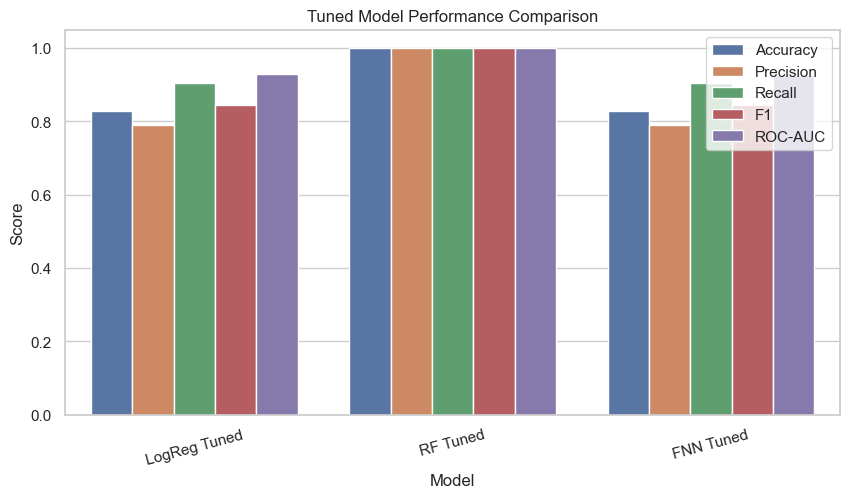

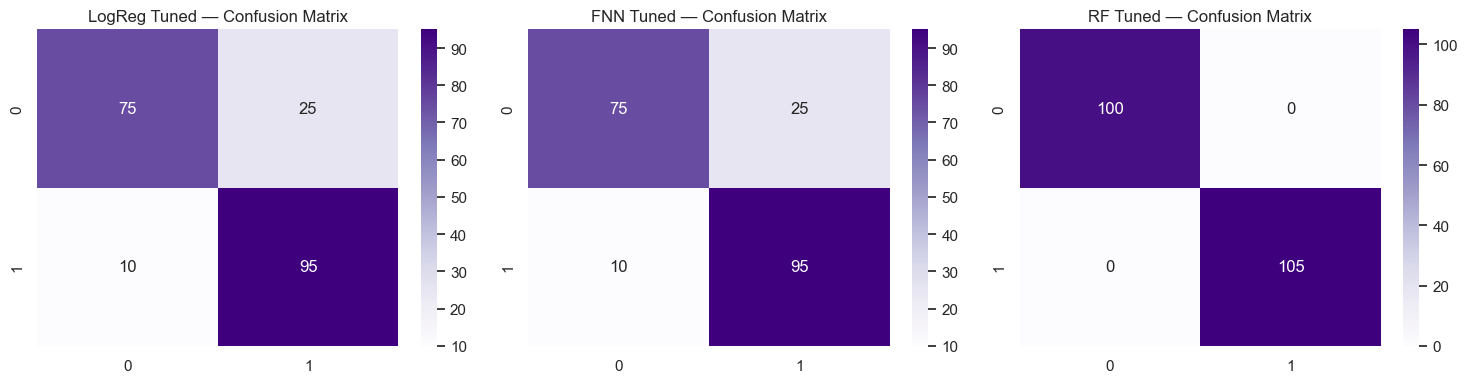

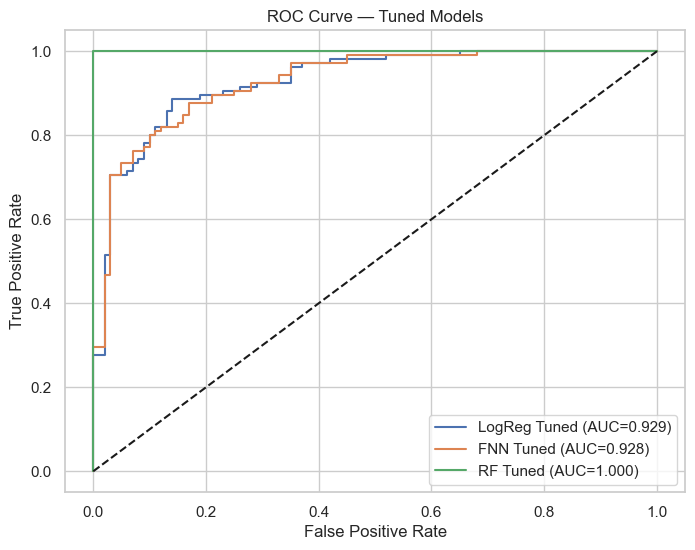

In [13]:
# ==============================================
# MODEL TUNING + VISUALIZATION
# ==============================================

from sklearn.model_selection import GridSearchCV
from tensorflow.keras import backend as K

# Logistic Regression Tuning
param_grid_lr = {'C':[0.01,0.1,1,10]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, scoring='f1', cv=5)
grid_lr.fit(X_train_bal, y_train_bal)
best_lr = grid_lr.best_estimator_
y_pred_lr_tuned = best_lr.predict(X_test_processed)
y_pred_lr_tuned_prob = best_lr.predict_proba(X_test_processed)[:,1]

# Random Forest Tuning
param_grid_rf = {'n_estimators':[100,200],'max_depth':[8,10,12]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='f1', cv=3)
grid_rf.fit(X_train_bal, y_train_bal)
best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_processed)
y_pred_rf_tuned_prob = best_rf.predict_proba(X_test_processed)[:,1]

# FNN tuning (manual)
params = [
    {'n1':64, 'n2':32, 'lr':0.001, 'epochs':30},
    {'n1':128,'n2':64, 'lr':0.0005,'epochs':50}
]
best_f1 = 0
for p in params:
    K.clear_session()
    model = Sequential([
        Input(shape=(X_train_bal.shape[1],)),
        Dense(p['n1'], activation='relu'), Dropout(0.3),
        Dense(p['n2'], activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(p['lr']), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_bal, y_train_bal, epochs=p['epochs'], batch_size=64, verbose=0)
    prob = model.predict(X_test_processed)
    pred = (prob>0.5).astype(int)
    score = f1_score(y_test, pred)
    if score > best_f1:
        best_f1, best_fnn, best_prob_fnn = score, model, prob

y_pred_fnn_tuned = (best_prob_fnn>0.5).astype(int)

# Summary of tuned results
results_tuned = [
    evaluate_model("LogReg Tuned", y_test, y_pred_lr_tuned, y_pred_lr_tuned_prob),
    evaluate_model("RF Tuned", y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob),
    evaluate_model("FNN Tuned", y_test, y_pred_fnn_tuned, best_prob_fnn.ravel())
]

results_tuned_df = pd.DataFrame(results_tuned, columns=["Model","Accuracy","Precision","Recall","F1","ROC-AUC"])
print("\n=== Tuned Model Comparison ===")
print(results_tuned_df)

# =====================
# 📊 Visualize Tuned Results
# =====================

# Bar plot tuned performance
results_tuned_melt = results_tuned_df.melt(id_vars="Model", value_vars=["Accuracy","Precision","Recall","F1","ROC-AUC"])
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="value", hue="variable", data=results_tuned_melt)
plt.title("Tuned Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend(title="")
plt.show()

# Confusion matrices
plt.figure(figsize=(15,4))
for i, (name, preds) in enumerate({
    "LogReg Tuned": y_pred_lr_tuned,
    "FNN Tuned": y_pred_fnn_tuned,
    "RF Tuned": y_pred_rf_tuned
}.items(), 1):
    plt.subplot(1,3,i)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f"{name} — Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC curves — tuned models
plt.figure(figsize=(8,6))
for name, prob in {
    "LogReg Tuned": y_pred_lr_tuned_prob,
    "FNN Tuned": best_prob_fnn.ravel(),
    "RF Tuned": y_pred_rf_tuned_prob
}.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1],[0,1], 'k--')
plt.title("ROC Curve — Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

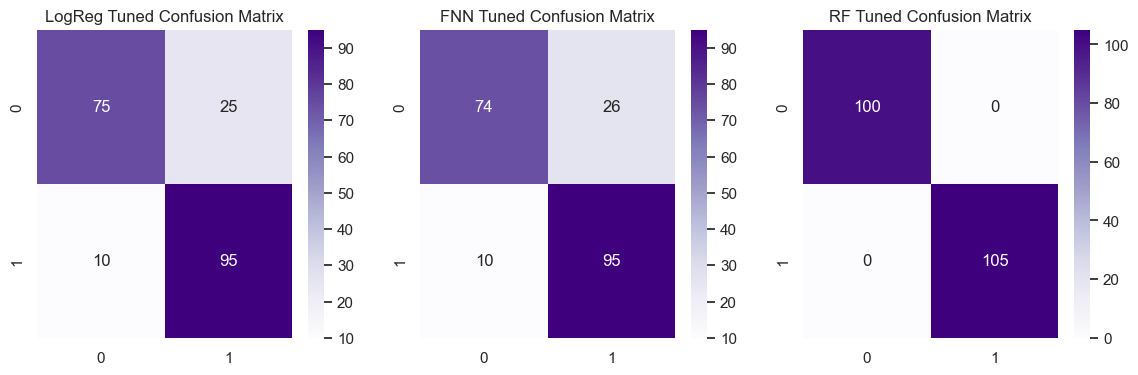

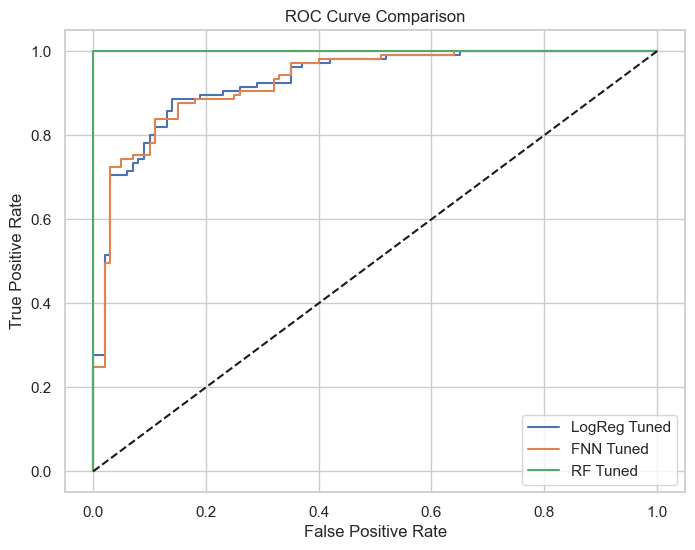

In [7]:
# ==============================================
# CONFUSION MATRIX & ROC CURVES
# ==============================================

models = {
    "LogReg Tuned": (y_pred_lr_tuned, y_pred_lr_tuned_prob),
    "FNN Tuned": (y_pred_fnn_tuned, best_prob_fnn.ravel()),
    "RF Tuned": (y_pred_rf_tuned, y_pred_rf_tuned_prob)
}

# Confusion Matrices
plt.figure(figsize=(14,4))
for i,(name,(pred,prob)) in enumerate(models.items(),1):
    plt.subplot(1,3,i)
    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Purples')
    plt.title(f"{name} Confusion Matrix")
plt.show()

# ROC Curves
plt.figure(figsize=(8,6))
for name,(pred,prob) in models.items():
    fpr,tpr,_ = roc_curve(y_test,prob)
    plt.plot(fpr,tpr,label=name)
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

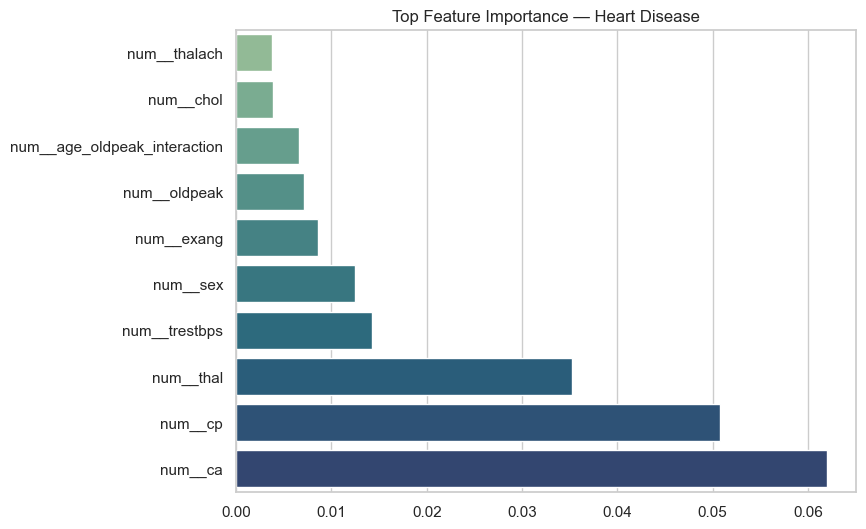

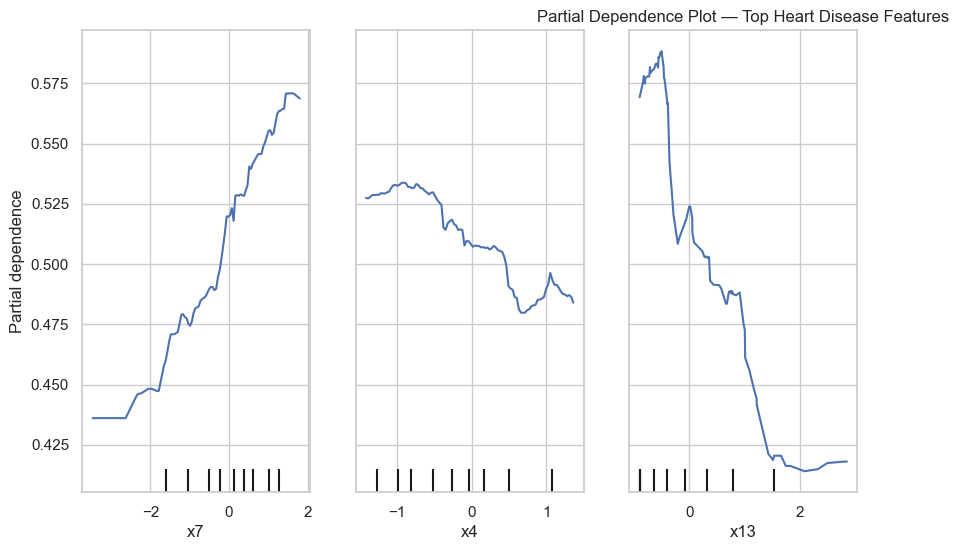

In [11]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

best_model = best_rf  # assuming RF best; change if needed

feature_names = preprocessor.get_feature_names_out()
perm = permutation_importance(best_model, X_test_processed, y_test, n_repeats=10, scoring='f1')

idx = perm.importances_mean.argsort()[-10:]
plt.figure(figsize=(8,6))
sns.barplot(
    x=perm.importances_mean[idx],
    y=np.array(feature_names)[idx],
    hue=np.array(feature_names)[idx],   # set hue to same variable
    palette="crest",
    legend=False
)
plt.title("Top Feature Importance — Heart Disease")
plt.show()

# PDP for top numeric features
fig, ax = plt.subplots(figsize=(10,6))
PartialDependenceDisplay.from_estimator(best_model, X_test_processed, features=list(idx[:3]), ax=ax)
plt.title("Partial Dependence Plot — Top Heart Disease Features")
plt.show()